# Chapter 17: New Developments and Challenges in Text-to-Image Generation

This chapter covers:

* How OpenAI's DALL-E series work
* The idea behind Google's Imagen works
* Features added in MidJourney beyond Stable Diffusion
* Testing if ChatGPT and Stable Diffusion have the Pink Elephant problem
* Concerns about text-to-image models (resource consumption, ethical use, intellectual property, and bias)


This is an exciting time for AI enthusiasts in general. Along with other generative models, text-to-image generation has made great strides in recent years, transforming from rudimentary image synthesis into a sophisticated and creative tool capable of generating highly detailed and realistic images from text prompts. In this field, OpenAI's DALL-E series, Google's Imagen, and the latent diffusion models like Stable Diffusion represent major milestones. These models take advantage of advancements in deep learning, particularly in Transformer architectures and diffusion models, to bridge the gap between linguistic and visual modalities. In this chapter, we'll discuss the ideas behind OpenAI's DALL-E series and Google's Imagen. Since we have discussed Stable Diffusion in detail in Chapter 12, we'll discuss MidJourney, an application largely based on Stable Diffusion, focusing on what new features MidJourney has provided for end users. 

The Pink Elephant problem refers to a cognitive phenomenon where, when someone is told not to think about a particular object or concept, such as a "pink elephant," they are unable to avoid thinking about it. Apparently, the state of the art text to image models have a similar problem. In early 2024, many people pointed out on social media that DALL-E and other AI models couldn't create an image of a room without an elephant. It always drew an elephant in the room. Soon after this, the issue disappeared. It's likey that the AI providers took ad-hoc measures to fix this specific issue. However, the pink elephant problem still exists. In this chapter, I'll test both ChatGPT and Stable Diffusion and neither can create an image of a man without a beard: the generated image is always a man with a beard. 

There are many other concerns related to these state of the art text-to-image models: resource consumption, misinformation, intellectual property rights, and bias. Text-to-image generative AI models have made tremendous progress in the past few years, becoming a transformative tool in art, design, and artificial intelligence. However, as these models become more integrated into society, addressing the above concerns will be essential for their responsible and sustainable development.

# 1. OpenAI's DALL-E Series
In this section, you'll learn three different versions of OpenAI's DALL-E series and how they differ from each other. 

## 1.1 DALL-E
DALL-E was proposed by a group of OpenAI researchers in 2021 in the paper Zero-Shot Text-to-Image Generation (https://arxiv.org/abs/2102.12092). The paper introduces DALL-E as a deep-leaning model that can generate images directly from a text-prompt. DALL-E generates images from textual descriptions using a variant of GPT-3. It has demonstrated the ability to create a wide range of images from diverse textual inputs. It showed the potential of Transformer-based models for creative tasks beyond text generation.

The idea behind DALL-E is similar to the idea behind DALL-E mini that we discussed in the last chapter (Chapter 16). The model compresses images into a sequence of image tokens. At the same time, it compresses the corresponding captions of these images into the same latent space and train a model to force the image embeddings and text embeddings to be the same. 

Once the model is trained, we first generate text embeddings for the text prompts. Since the trained DALL-E model forces the image embeddings and text embeddings to have the same value, the image embeedings should be similar, if not identical, to the text embeddings from the prompts. We'll then use the trained VQGAN to decode these image tokens into high resolution images, as we have done in Chapter 15. 

## 1.2 DALL-E 2
DALL-E 2 is an improved version of the original DALL-E, with significant enhancements in image quality and coherence. It was proposed by a group of OpenAI researchers in the 2022 paper Hierarchical Text-Conditional 
Image Generation with CLIP Latent (https://arxiv.org/abs/2204.06125). 

DALL-E 2 utilizes contrastive language–image pre-training (CLIP) to improve the connection between textual descriptions and generated images. It generates images with higher resolution and greater photorealism compared to the original DALL-E. It can edit existing images based on textual descriptions, enhancing its versatility.

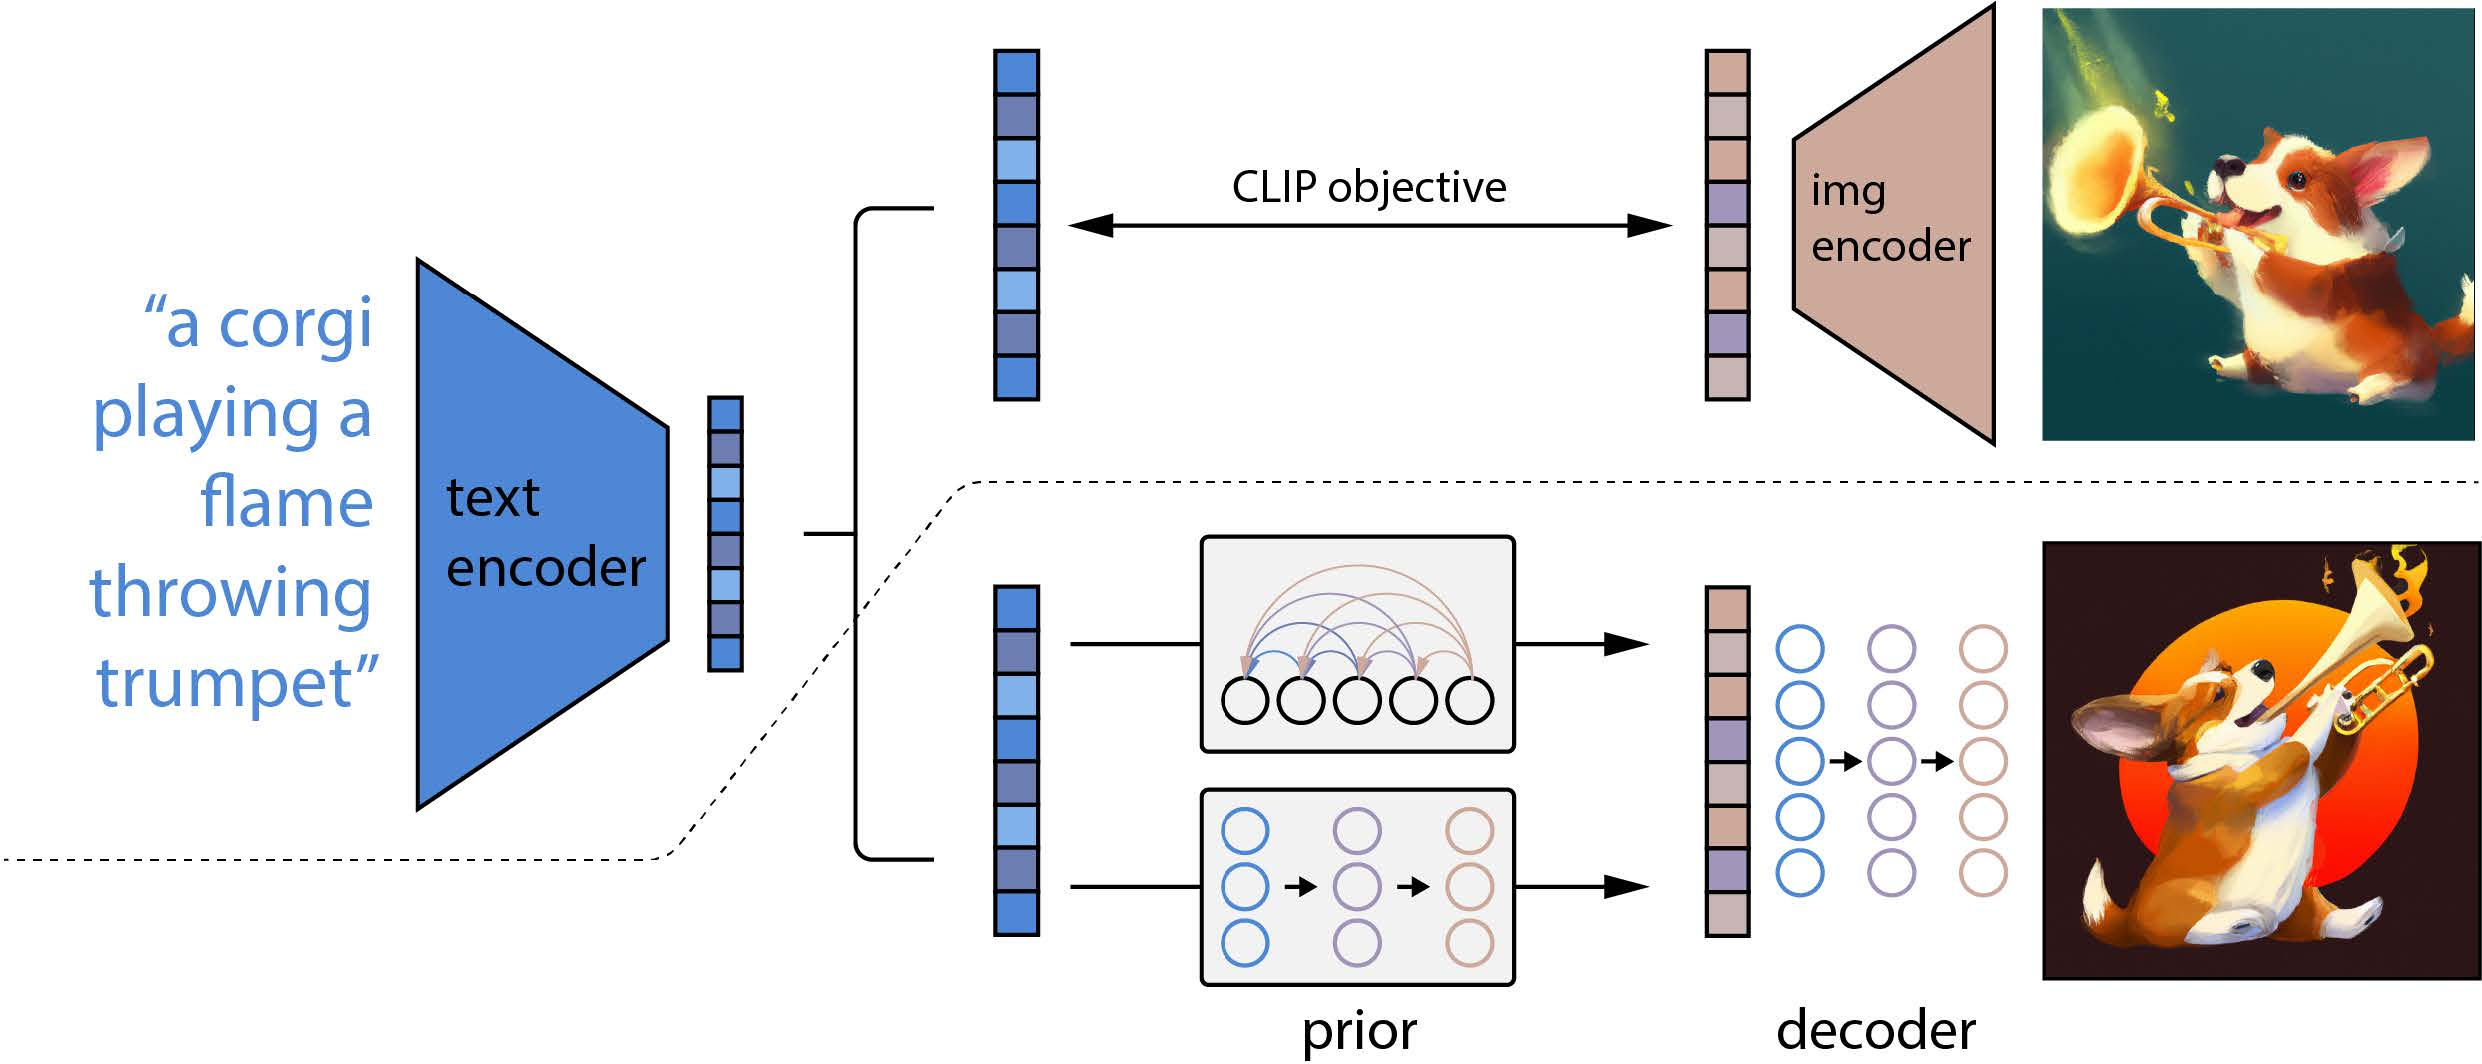

Figure 1: The DALL-E 2 architecture. The training process for the CLIP model is above the dotted line. The image generation process is depicted below the dotted line. (source: Hierarchical Text-Conditional Image Generation with CLIP Latents, 2022). 

The main component of DALL-E 2 is the CLIP model, which we discussed in detail in Chapter 9. It compresses image-caption pairs into the same shared latent space. 

When generating an image, a text prompt is fed to a text encoder that is trained to map the description to a latent space. The model then maps the text encoding to a corresponding image embedding in the shared latent space. The decoder of the model then creates an image based on this image embedding. 

## 1.3 DALL-E 3
DALL-E 3 is the successor to DALL-E 2. It's proposed in the paper Improving Image Generation with Better Captions in 2023 (https://cdn.openai.com/papers/dall-e-3.pdf). 

DALL-E 3 incorporates advanced techniques in generative pre-training, leading to even more detailed and coherent image generation.
It uses improved contextual understanding and adherence to textual descriptions. As a result, it has enhanced ability to handle complex and abstract prompts, generating images that are both creative and accurate to the provided text.

# 2. Google's Imagen
Imagen was proposed in the paper titled "Photorealistic Text-to-Image Diffusion Models with Pretrained Text Encoders," authored by a group of Google researchers in 2022 (https://arxiv.org/abs/2205.11487). The method leverages a combination of large pre-trained text encoders and diffusion models to generate high-quality images from textual descriptions.
In this section, we'll provide an overview of the model, the model architecture and how it was trained. Finally, you'll learn how to generate image from text using the trained model.

## 2.1 Imagen: Architecture and Training
Google's Imagen is a sophisticated text-to-image generation model that leverages diffusion models and large pre-trained text encoder. 

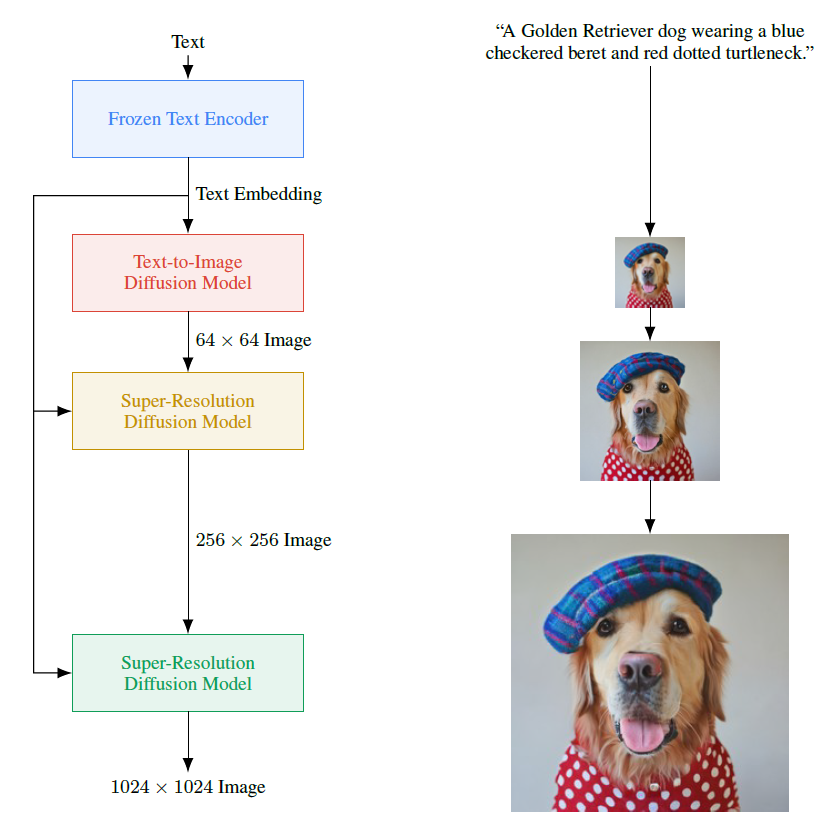

Figure 2: The architecture and training of Google's Imagen (source: Photorealistic Text-to-Image Diffusion Models with Pretrained Text Encoders, 2022).  

Imagen uses a large pre-trained text encoder, specifically the T5-XXL model (Text-to-Text Transfer Transformer), which converts the input text prompt into a rich, high-dimensional text embedding. The T5 model has been trained on a massive dataset and can capture complex language structures. At teh same time, Imagen employs a cascaded diffusion model approach, where multiple diffusion models are used in a sequence to generate high-resolution images. The process starts with generating a low-resolution image and then progressively refines it to higher resolution. 

The first model in the cascade generates a low-resolimage (e.g., 64x64 pixels) from the text. Subsequent models take the low-resolution image and progressively upsample it to higher resolutions (e.g., 256x256, and finally 1024x1024 pixels). These models are conditioned on both the low-resolution image and the original text prompt. The core architecture of the diffusion models is based on U-Net, which is known for its effectiveness in image generation tasks. U-Net consists of an encoder-decoder structure with skip connections that help in preserving fine-grained details during the generation process. 

Imagen was trained on large-scale datasets of image-text pairs. These datasets contain millions of images with corresponding descriptive captions, enabling the model to learn the mapping between textual descriptions and corresponding images. The T5-XXL text encoder is pre-trained on a large text corpus and then fine-tuned on image-text pairs to better align text embeddings with image embeddings.

The base model is trained to generate low-resolution images conditioned on text embeddings. It learns to denoise a Gaussian noise vector into a coherent image that correspond to the text prompt. Each super-resolution model is trained to take a lower resolution image and produce a higher resolution image, maintaining consistency with the text prompt. These models also use diffusion processes to refine the image. The models are trained sequentially. First, the base model is trained, followed by each super-resolution model. The training process uses a combination of loss functions, including reconstruction loss and perceptual loss, to ensure high fidelity and photorealism in generating high-quality images from text descriptions.

## 2.2 Use the Trained Imagen Model to Generate Images from Text Prompts
After the Imagen model is trained, we can use it to generate images from text prompts. First, the input text prompt is processed using the pre-trained T5-XXL text encoder to produce a high-dimensional text embedding. This embedding captures the semantic meaning of the text.

The text embedding is fed into the base diffusion model, which generates a low-resolution image of 64x64 pixels from a noise vector. The model iteratively refines the noise vector through a series of denoising steps to produce the initial image.

The low-resolution image and the original text embedding are passed to the first super-resolution model, which upsamples the image to a higher resolution of 256x256 pixels. This process is repeated with subsequent super-resolution models until the desired high-resolution image (1024x1024 pixels) is produced. 

The final high-resolution image is the result of the cascaded diffusion process, where each model in the cascade adds more detail to the image while ensuring it remains consistent with the text prompt.

For example, consider this text prompt: "A Golden Retriever dog wearing a blue checkered beret and red dotted turtlebeck." To generate an image that matches this prompt, we first use the T5-XXL model to process the prompt to generate a text embedding. We then use the base diffusion model to generate a 64x64 image based on this text embedding (top image on the right side of Figure 2). The first super-resolution model upsamples the image to 256x256 pixels (middle image on the right side of Figure 2). The second super-resolution model further refines it to 1024x1024 pixels (bottom image on the right side of Figure 2), which is the final output: a high-resolution, photorealistic image of a golden retriever with a blue checkered beret and a red dotted turtleneck.

# 3. MidJourney
MidJourney's text-to-image generation model is largely based on the advancements in diffusion models, particularly drawing from the foundational work on latent diffusion and Stable Diffusion. MidJourney's development focuses on creating high-quality artistic images from textual prompts, and it operates through a user-friendly interface on platforms like Discord and web applications.

## 3.1 Architecture and Training of MidJourney
The core architecture of MidJourney is heavily influenced by the principles of latent diffusion and Stable Diffusion, which employ a process of iteratively refining a noisy image to match the given text description. The underlying model architecture typically involves a UNet-based structure. UNet models are known for their ability to effectively capture and reconstruct fine details by using convolutional layers and skip connections.

The input text is first encoded using a Transformer-based language model. This model generates a rich, contextualized embedding of the text prompt. The encoded text is used to guide the diffusion process. In this process, the model starts with a noisy image and iteratively denoises it, guided by the text embeddings, until a clear and coherent image emerges. MidJourney also incorporates mechanisms like Classifier-Free Guidance (CFG) to balance creativity and adherence to the prompt. This involves adjusting the influence of the text prompt on the image generation process, where a higher CFG scale results in images that are more closely aligned with the text but might sacrifice some creative variance.

The training of MidJourney involves several steps. First, a large dataset of images paired with textual descriptions is used. The model is pretrained on this dataset to learn the general association between text and image features. Specific techniques such as Low-Rank Adaptation (LoRA) are employed to fine-tune the model on smaller, more specialized datasets. This fine-tuning helps the model adapt to specific artistic styles or detailed image characteristics. Techniques like ControlNet can be integrated to provide additional control over the image generation process, such as enforcing spatial consistency or stylistic adherence.

## 3.2 Generating Images from Text Prompts with MidJourney
Using the trained MidJourney model to generate images from text involves several steps. The user provides a text prompt describing the desired image. The input text is encoded to create a contextualized embedding. The trained MidJourney model generates an initial noisy image and begins the iterative process of denoising it, guided by the text embedding. Over multiple steps, the model refines the image, reducing noise and enhancing details to match the description. The final image is produced after completing the specified number of denoising steps.


Users can access the model via the MidJourney Discord server or the website https://alpha.midjourney.com/home. Once there, users need to enter a prompt with a detailed text description. For instance, "A surrealistic landscape with floating islands and waterfalls, in vibrant colors". Users can adjust settings such as the CFG scale to control the balance between adherence to the prompt and creative variance. After receiving the prompt, MidJourney will generate an image. Users can refine their prompts based on the output to get closer to their desired result.
MidJourney’s approach and technological integration make it a powerful tool for generating high-quality, imaginative images from text, offering users a combination of control and creativity. 

# 4. The Pink Elephant Problem
The Pink Elephant Problem refers to a cognitive phenomenon where, when someone is told not to think about a particular object or concept, such as a "pink elephant," they are unable to avoid thinking about it. 

The state of the art text to image models have a similar problem. In August 2024, a LinkedIn post by Emmanuel Maggiori (https://www.linkedin.com/posts/emaggiori_ai-chatgpt-hallucination-activity-7219648325300424704-5M7w/?utm_source=share&utm_medium=member_desktop) states the following "A few weeks ago, a lot of people pointed out that DALL-E and other AI models couldn't "draw a picture of a room without an elephant." It always put an elephant in the room. This went viral. Soon later, this issue disappeared. I'm guessing creators of AI took ad-hoc measures to fix this specific issue (they often create training examples manually to fine-tune their models). But the issue of *not* having something still persists. I asked ChatGPT repeatedly to draw a picture of a man without a beard, and the resulting man almost always had a beard (although sometimes it wasn't as visible as in this example)."

In this section, we test two prominent text to iamge models, ChatGPT and Stable Diffusion, on whether they can generate an image of a man without a beard.  

## Does ChatGPT Have A Pink Elephant Problem?
I am performing this test on September 6, 2024 using the browser interface of ChatGPT. First, I asked ChatGPT 4o to "draw me an image of a room with no elephant in it." ChatGPT gave me two images of a room with no elephant in it, as shown in the figure below:
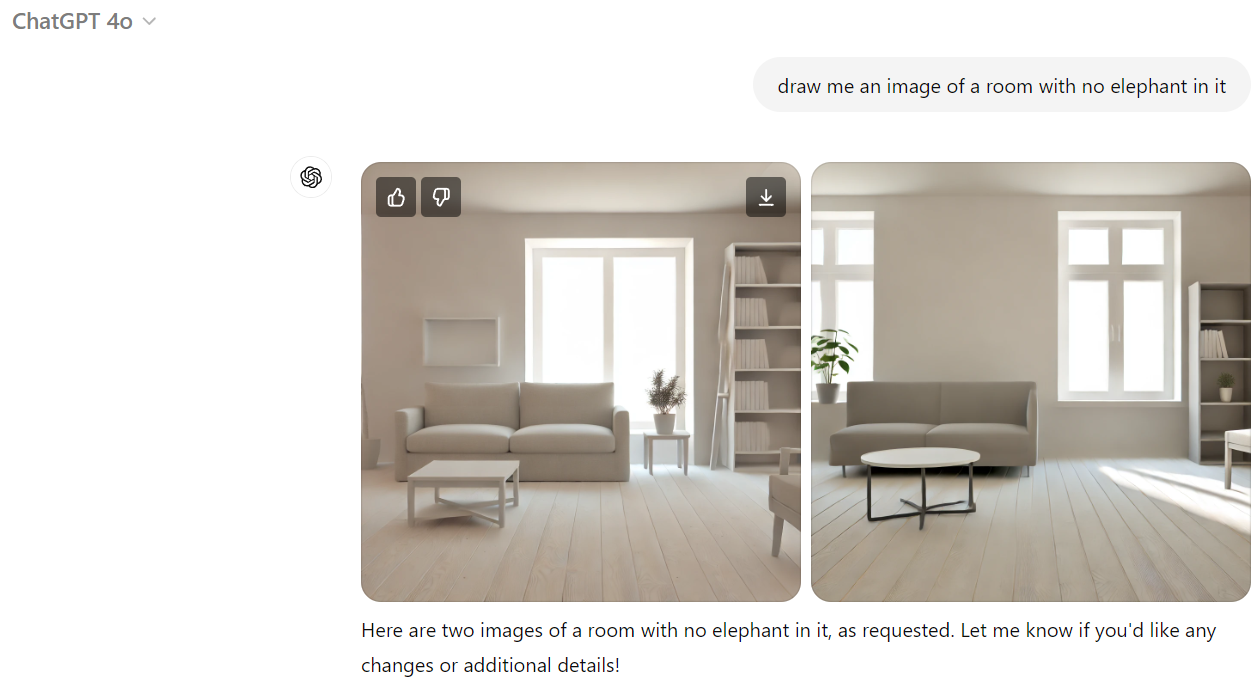

As you can see, there is no elephant in either of the two generted images. 

Next, I asked ChatGPT 4o to "draw me an image of a man without a beard." ChatGPT gave me an image as shown in the figure below:
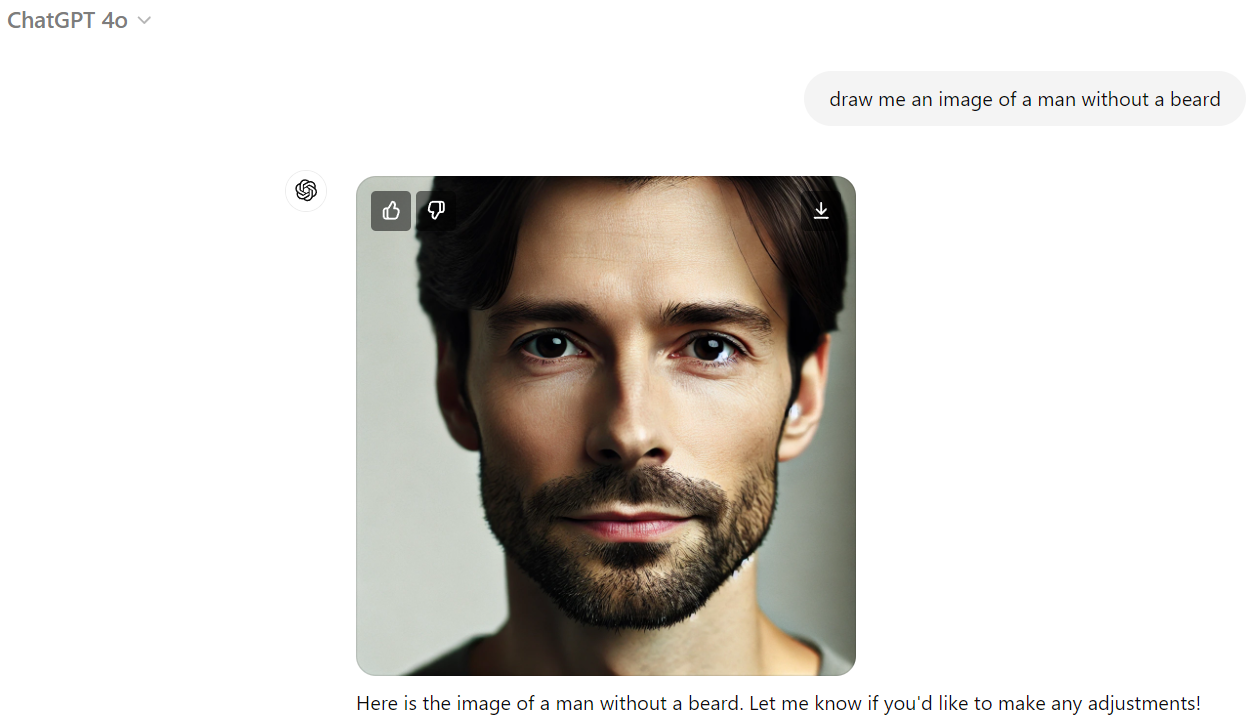

The generated image clearly shows a man with a beard. ChatGPT does have a pink elepant problem. 

## Stable Diffusion Also Has A Pink Elephant Problem
Next, we test if Stable Diffusion has a pink elephant problem. We use the same program from Chapter 12 to generate an image with the prompt "draw me an image of a man without a beard."

In [ ]:
# folder = D:\MANNING\diffusion\StableDiffusion\pytorch-stable-diffusion-main\sd
device = "cuda"
from transformers import CLIPTokenizer
tokenizer = CLIPTokenizer(
r"D:\MANNING\diffusion\StableDiffusion\pytorch-stable-diffusion-main\sd\data/tokenizer_vocab.json", 
merges_file=
r"D:\MANNING\diffusion\StableDiffusion\pytorch-stable-diffusion-main\sd\data/tokenizer_merges.txt")
model_file = \
r"D:\MANNING\diffusion\StableDiffusion\pytorch-stable-diffusion-main\sd\data/hollie-mengert.ckpt"

import sys
sys.path.append("pytorch-stable-diffusion-main/sd/")

from model_converter import load_from_standard_weights
from clip import CLIP
from encoder import VAE_Encoder
from decoder import VAE_Decoder
from diffusion import Diffusion

state_dict = load_from_standard_weights(model_file, device)
encoder = VAE_Encoder().to(device)
encoder.load_state_dict(state_dict['encoder'], strict=True)
decoder = VAE_Decoder().to(device)
decoder.load_state_dict(state_dict['decoder'], strict=True)
diffusion = Diffusion().to(device)
diffusion.load_state_dict(state_dict['diffusion'], strict=True)
clip = CLIP().to(device)
clip.load_state_dict(state_dict['clip'], strict=True)

cfg_scale=8
num_reference_steps=50
seed=0

import torch
from ddpm import DDPMSampler
from tqdm import tqdm

def get_time_embedding(timestep):
    freqs = torch.pow(10000, -torch.arange(start=0, 
                       end=160, dtype=torch.float32) / 160) 
    x = torch.tensor([timestep], 
             dtype=torch.float32)[:, None] * freqs[None]
    return torch.cat([torch.cos(x), torch.sin(x)], dim=-1)

prompt = "draw me an image of a man without a beard."
uncond_prompt=""
with torch.no_grad():
    generator=torch.Generator(device=device)
    generator.manual_seed(seed)
    # convert to a list of seq_len=77
    cond_tokens=tokenizer.batch_encode_plus(
        [prompt], padding="max_length", max_length=77).input_ids    
    cond_tokens=torch.tensor(cond_tokens,
                             dtype=torch.long,device=device)
    cond_context = clip(cond_tokens).to(device)

    uncond_tokens=tokenizer.batch_encode_plus(
        [uncond_prompt], padding="max_length", 
        max_length=77).input_ids    
    uncond_tokens=torch.tensor(uncond_tokens,
                               dtype=torch.long,device=device)
    uncond_context = clip(uncond_tokens).to(device)    
    context=torch.cat([cond_context,uncond_context])
    sampler=DDPMSampler(generator)
    sampler.set_inference_timesteps(num_reference_steps)
    # start with pure noise
    latent_shape=(1,4,64,64)
    latents=torch.randn(latent_shape,generator=generator,
                        device=device)
    # denosing the latents
    timesteps=tqdm(sampler.timesteps)
    for i, timestep in enumerate(timesteps):
        time_embedding=get_time_embedding(timestep).to(device)
        model_input=latents.to(device)
        model_input=model_input.repeat(2,1,1,1)
        # predict noise
        model_output=diffusion(model_input,context,time_embedding)
        output_cond,output_uncond=model_output.chunk(2)
        model_output=cfg_scale*(output_cond-output_uncond)\
        +output_uncond
        # denoising: remove noise from image 
        latents=sampler.step(timestep,latents,model_output)
    images=decoder(latents)
# show and save images
img=images.cpu().permute(0,2,3,1).numpy()
img=img[0]/2+0.5
import matplotlib.pyplot as plt
plt.figure(dpi=300)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(f"{prompt}.png")   
plt.show()      

The output is as follows:

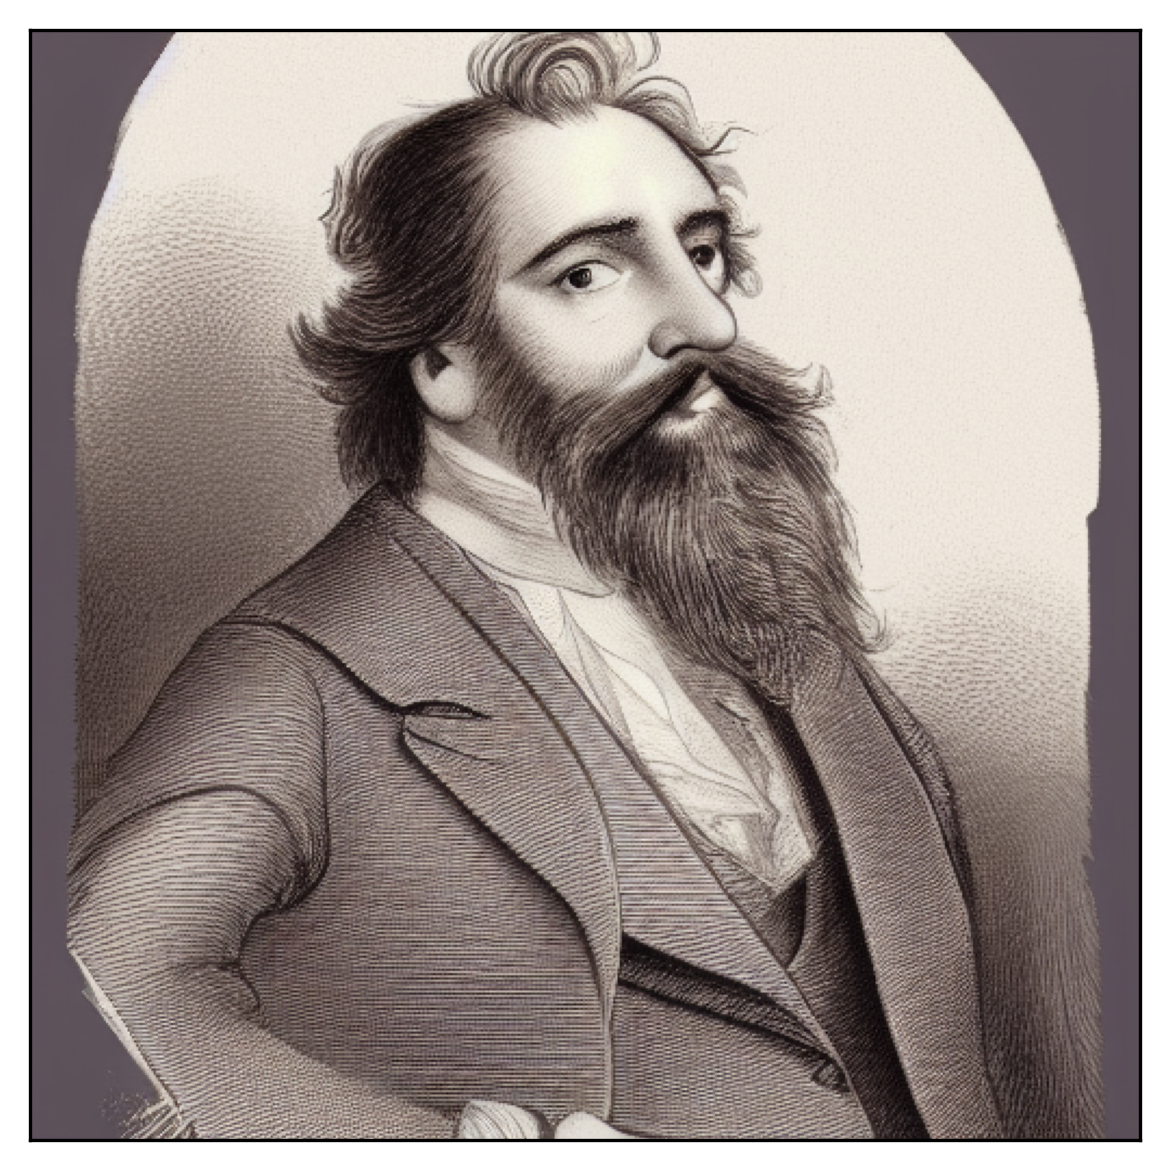

The image shows a man with a beard. Stable Diffusion also has a pink elephant problem. 

# 5 Other Challenges and Concerns

The state of the art text to image generative models also face many other challenges and concerns. I hightlight four concerns below. 

The first concern is related to computational costs and environmental impacts of these text to image models. The development and deployment of all the state of the art text-to-image models involve high computational costs. Training these models requires significant resources, including large datasets and powerful hardware. The energy consumption associated with training can be substantial. The environmental impact of these models is a serious concern. While techniques like pruning, quantization, and transfer learning have been used to mitigate these costs, the scalability of text-to-image models remains a pressing issue. Reducing the computational footprint while maintaining high-quality outputs is a major area of ongoing research.

The second concern is relate to the misuse of the output from these text to image models. The capacity to generate realistic images opens up possibilities for misuse, such as deepfakes or misinformation. These state of the art text to image generative models can be exploited for creating and spreading misinformation, propaganda, or manipulative content. This poses significant risks to public discourse, democracy, and trust in information. The solution to this concern lies in developing robust content moderation systems. Establishing guidelines for responsible use and fostering collaborations between AI developers, policymakers, and media organizations are crucial steps in combating misinformation.

The third concern is related to intellectual property rights. The training data used in these models are often scraped from the web without the explicit consent of the original creators, raising questions about the ownership of AI-generated images. Supporters argue that the way data is used to train these generative models is transformative: the model doesn’t merely regurgitate the data but uses it to generate new, original content. This transformation could qualify under the "fair use" doctrine, which allows limited use of copyrighted material without permission if the use adds new expression or meaning. Critics argue that these generative models are trained on vast amounts of copyrighted images and texts without permission, which goes beyond what might be considered "fair use." The scale of data used and the direct ingestion of copyrighted material without transformation during training could be seen as infringing. The debate is ongoing. It's a debate that likely needs to be resolved by legislative and judicial bodies to provide clear guidelines and ensure that the interests of all parties are fairly represented.

Finally, text-to-image models trained on broad datasets often incorporate inherent biases related to race, gender, or culture. For example, generating images from a prompt like "a doctor" or "a leader" might disproportionately yield stereotypical representations. This bias is not just a technical problem but a social one, as it reflects and amplifies existing inequalities in society. Developing methods to audit and mitigate bias in these models is an ongoing challenge, requiring a concerted effort from both AI developers and social scientists. However, we must keep in mind not to overcorrect. A counterexample is that Google’s Gemini overcorrected the stereotypes in image generation, by including people of color in groups like Nazi-era German soldiers (https://www.theverge.com/2024/2/21/24079371/google-ai-gemini-generative-inaccurate-historical).  

Text-to-image generative AI models have made tremendous progress in the past few years, becoming a transformative tool in art, design, and artificial intelligence. However, as these models become more integrated into society, addressing the challenges of resource consumption, ethical use, and bias will be essential for their responsible and sustainable development.